In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/MIT/Semester-6/Machine Learning Lab/Datasets/winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [4]:
df.isna().sum()

type                    6486
fixed acidity           6486
volatile acidity        6486
citric acid             6486
residual sugar          6486
chlorides               6486
free sulfur dioxide     6486
total sulfur dioxide    6486
density                 6486
pH                      6486
sulphates               6487
alcohol                 6486
quality                 6486
dtype: int64

In [5]:
df.duplicated().sum()

6486

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
col_impute = ["fixed acidity", "volatile acidity", "citric acid", 'residual sugar', 'chlorides', 'pH', 'sulphates']
for i in col_impute:
    df[i] = imputer.fit_transform(df[[i]]).ravel()

In [11]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
df['type'] = lbl_enc.fit_transform(df['type'])

In [12]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,2,5.9,0.23,0.08,2.0,0.045,NaN,NaN,NaN,3.42,0.40,NaN,NaN


In [13]:
df.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.279866,-0.804396,0.218021,0.315397,-0.816210,0.213531,0.916275,0.240179,-0.502792,-0.695118,-0.661050,0.408248
fixed acidity,0.279866,1.000000,-0.390241,0.483390,0.512891,-0.367957,0.300822,0.534288,0.238789,-0.655102,-0.236404,-0.481549,0.388406
volatile acidity,-0.804396,-0.390241,1.000000,-0.697214,-0.473923,0.796555,-0.057792,-0.788848,-0.206671,0.707591,0.665716,0.340225,-0.602308
citric acid,0.218021,0.483390,-0.697214,1.000000,0.494707,-0.462755,-0.181246,0.551883,0.160221,-0.652474,-0.277451,-0.244240,0.487004
residual sugar,0.315397,0.512891,-0.473923,0.494707,1.000000,-0.473962,0.598163,0.714124,0.877718,-0.880991,-0.371631,-0.617381,0.280929
chlorides,-0.816210,-0.367957,0.796555,-0.462755,-0.473962,1.000000,-0.110578,-0.732726,-0.352641,0.610596,0.651843,0.562735,-0.691764
free sulfur dioxide,0.213531,0.300822,-0.057792,-0.181246,0.598163,-0.110578,1.000000,0.444098,0.533239,-0.358515,-0.435799,-0.189970,-0.030176
total sulfur dioxide,0.916275,0.534288,-0.788848,0.551883,0.714124,-0.732726,0.444098,1.000000,0.386814,-0.863946,-0.697429,-0.660121,0.366508
density,0.240179,0.238789,-0.206671,0.160221,0.877718,-0.352641,0.533239,0.386814,1.000000,-0.648648,-0.058319,-0.572185,0.195737
pH,-0.502792,-0.655102,0.707591,-0.652474,-0.880991,0.610596,-0.358515,-0.863946,-0.648648,1.000000,0.438918,0.696872,-0.492444


In [15]:
df = df.drop(["fixed acidity", "volatile acidity", "chlorides", "density",
"pH", "sulphates"], axis=1)

<Axes: >

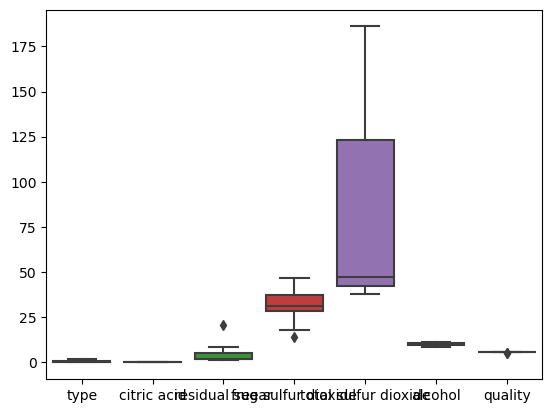

In [16]:
sns.boxplot(df)

In [17]:
df.columns

Index(['type', 'citric acid', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol', 'quality'],
      dtype='object')

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df<(Q1-1.5*IQR))| df>(Q3+1.5*IQR)).any(axis=1)
df_no_outliers = df[~outliers]

<Axes: >

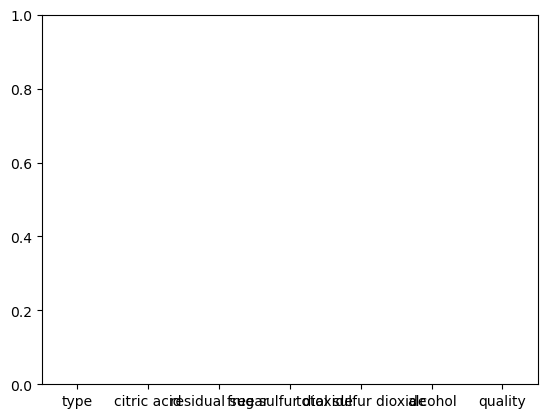

In [19]:
sns.boxplot(df_no_outliers)

In [20]:
X = df.drop("type", axis=1)
y = df["type"]

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size=0.2,random_state=0)
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(8, 6) (3, 6)
(8,) (3,)


In [22]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_std = scaler.fit_transform(Xtrain)
Xtest_std = scaler.transform(Xtest)

In [23]:
X.isna().sum()

citric acid             0
residual sugar          0
free sulfur dioxide     1
total sulfur dioxide    1
alcohol                 1
quality                 1
dtype: int64

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#neigh = KNeighborsClassifier(n_neighbors=3)
train_acc = np.zeros(15)
test_acc = np.zeros(15)
for i in range(1,15):
    print("Neighbours: ", i)
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(Xtrain_std, ytrain)
    train_acc[i] = neigh.score(Xtrain_std, ytrain)
    test_acc[i] = neigh.score(Xtest_std, ytest)
    print("Training accuracy: ", neigh.score(Xtrain_std, ytrain))
    print("Testing Accuracy: ", neigh.score(Xtest_std, ytest))
    ypred = neigh.predict(Xtest_std)
    print("Accuracy Score: ", accuracy_score(ytest, ypred))

Neighbours:  1


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [26]:
print(test_acc)
print(train_acc)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


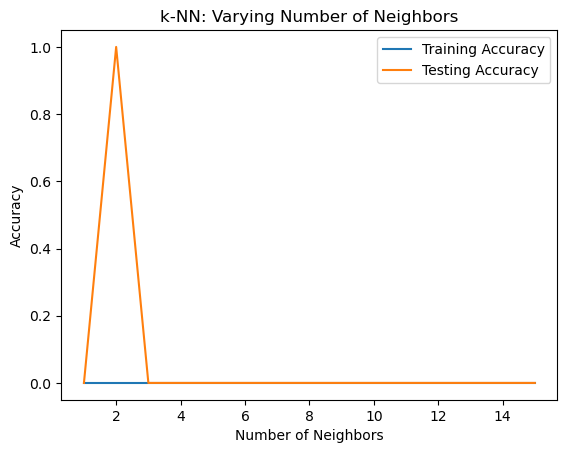

In [27]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,16), test_acc, label='Training Accuracy')
plt.plot(range(1,16), train_acc, label = "Testing Accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [29]:
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
for i in weights:
    print("WEIGHT: ", i)
for j in algo:
    print("Algorith used: ", j)
knn = KNeighborsClassifier(n_neighbors=4, algorithm=j, weights=i)
knn.fit(Xtrain_std, ytrain)
print("Training accuracy: ", knn.score(Xtrain_std, ytrain))
print("Testing Accuracy: ", knn.score(Xtest_std, ytest))
print()

WEIGHT:  uniform
WEIGHT:  distance
Algorith used:  auto
Algorith used:  ball_tree
Algorith used:  kd_tree
Algorith used:  brute
Training accuracy:  1.0


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=4, algorithm="auto", weights="uniform")
knn.fit(Xtrain_std, ytrain)
y_pred = knn.predict(Xtest_std)
cm = confusion_matrix(ytest, y_pred)
print(cm)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [31]:
cr = classification_report(ytest, y_pred)
print(cr)

NameError: name 'y_pred' is not defined

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm)
disp.plot()

NameError: name 'cm' is not defined